# ***Working with Data***
After you’ve identified the questions you’re trying to answer and have gotten your
hands on some data, you might be tempted to dive in and immediately start building
models and getting answers. But you should resist this urge. Your first step should be
to explore your data.

In [1]:
import os
os.chdir('../scratch')

In [2]:
#os.chdir('scratch')

In [3]:
os.getcwd()

'C:\\Users\\user\\Documents\\GitHub\\data-science-from-scratch\\scratch'

In [4]:
# Exploring One-Dimensional Data
import math
import random
from probability import inverse_normal_cdf
from collections import Counter
from matplotlib import pyplot as plt

In [5]:
def bucketsize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketsize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [6]:
random.seed(0)

#uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, and standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

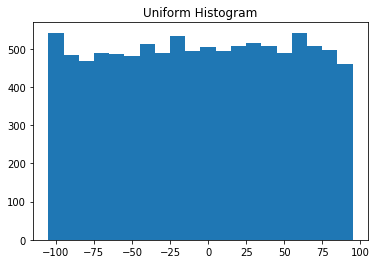

In [7]:
# Both have means close to 0 and std close to 58. However, they have very
#    different distributions.
plot_histogram(uniform, 10, "Uniform Histogram")

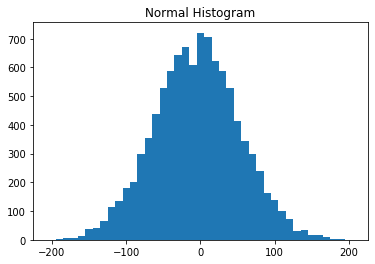

In [8]:
plot_histogram(normal, 10, "Normal Histogram")

In [16]:
# Two Dimensions
#    Now imagine you have a data set with two dimensions. Maybe in addition to
#    daily minutes you have years of data science experience. Of course you'd
#    want to understand each dimension individually. But you probably also want
#    to scatter the data.

# For example, consider another fake data set:

def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000) ]
ys1 = [ x + random_normal() / 2 for x in xs ]
ys2 = [ - x + random_normal() / 2 for x in xs ]

# If you were to run plot_histogram on ys1 and ys2 you'd get very similar
#    looking plots(indeed, both are normally distributed with the same mean
#    and standard deviation).

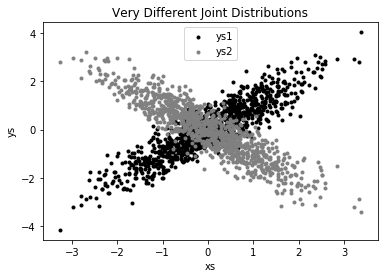

In [17]:
# But each has a very different joint distribution with xs
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [18]:
import numpy as np

xs = np.array(xs)
ys1 = np.array(ys1)
ys2 = np.array(ys2)

In [19]:
# correlation between xs and ys1
np.corrcoef(xs, ys1)

array([[1.        , 0.89915166],
       [0.89915166, 1.        ]])

In [20]:
np.corrcoef(xs, ys2)

array([[ 1.        , -0.90185212],
       [-0.90185212,  1.        ]])

In [25]:
from linear_algebra import get_column, shape

In [26]:
# Many Dimensions
#    With many dimensions, you'd like to know how all the dimensions relate
#    to one another. A simple approach is to look at the correlation matrix,
#    in which the entry in row i and column j, is the correlation between the
#    ith dimension and the jth dimension of the data

def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return np.corrcoef(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

In [28]:
_, num_columns = shape(xs)
fig, ax = plt.subplots(num_columns, num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        
        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))
            
        #unless i == j, in which case show the series name
        else: ax[i][i].annotate("series " + str(i), (0.5, 0.5),
                               xycorrds='axes fraction',
                               ha="center", va="center")
            
        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
            
    # fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())
    
    plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()